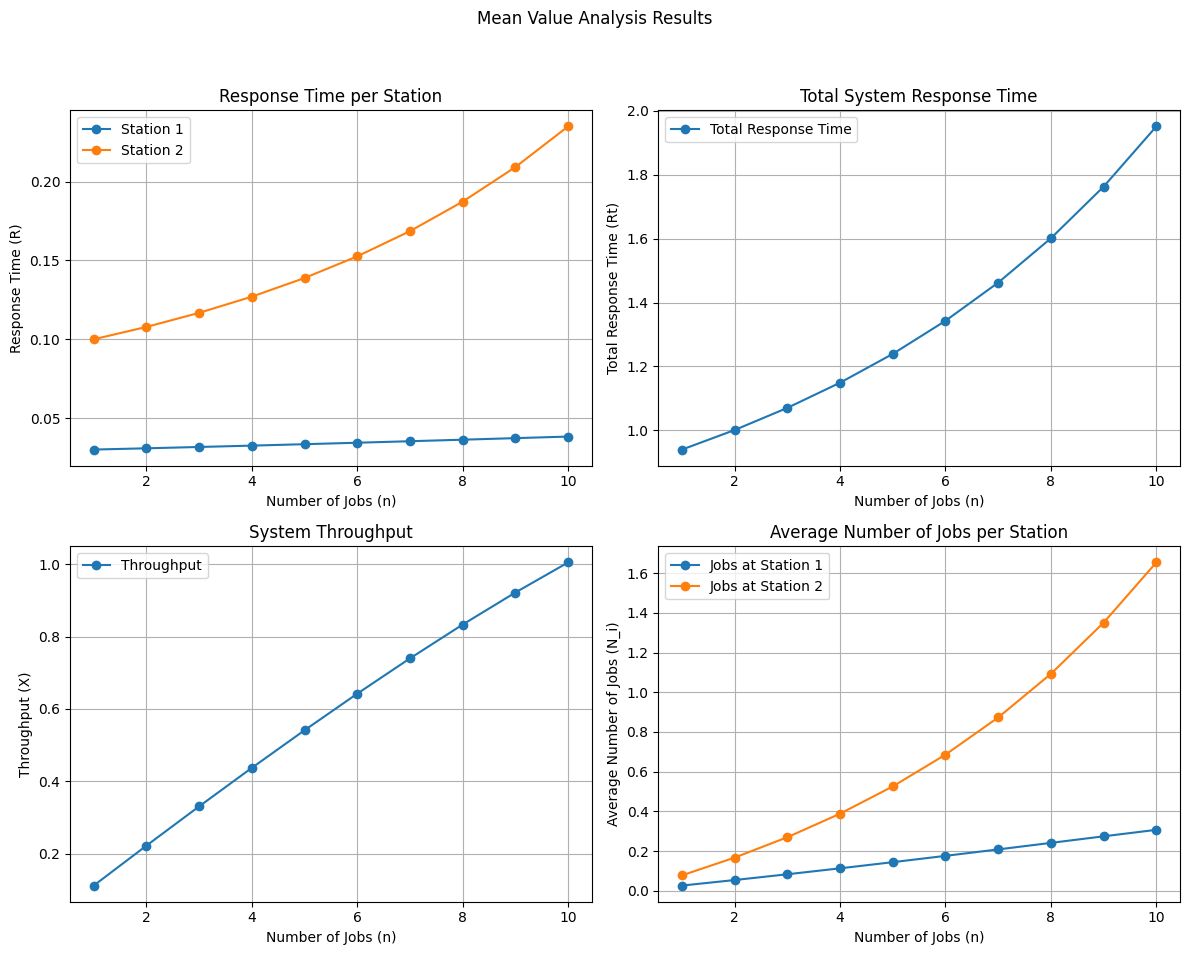

In [ ]:
def mean_value_analysis(N, Z, V, S):
    R = [0] * len(S)  
    X = [0] * N      
    R_combined = [] 
    R_total = []
    N_i = [[0 for _ in range(len(S))] for _ in range(N)] 
    
    for n in range(1, N + 1):
        tmp_R = []
        for i in range(len(S)):
            if n > 1:
                R[i] = S[i] * (1 + N_i[n-2][i])
            else:
                R[i] = S[i]
            
            tmp_R.append(R[i])
                
        R_combined.append(tmp_R)
                
        current_R = [0] * len(S)
        for i in range(len(S)):
             if n > 1:
                current_R[i] = S[i] * (1 + N_i[n-2][i])
             else:
                current_R[i] = S[i]

        total_response_time = Z + sum(V[i] * current_R[i] for i in range(len(S)))
        X[n-1] = n / total_response_time
        
        if n < N +1 :
             for i in range(len(S)):
                 N_i[n-1][i] = X[n-1] * V[i] * current_R[i]
                 
                 
    for i in range(N):
        suma = 0
        for j in range(len(V)):
            suma += V[j] * R_combined[i][j]
        R_total.append(suma)
                 
    return R_combined, R_total, X, N_i[:N] 


# Test
if __name__ == "__main__":
    N = 10  # Number of jobs
    Z = 8.0  # External arrival rate
    V = [8, 7]  # Service rates for each station
    S = [0.03, 0.1]  # Service times for each station
    
    R, Rt, X, N_i = mean_value_analysis(N, Z, V, S)
    
    # print("Response Times 12:", R)
    # print("Response Times T:", Rt)
    # print("Throughput:", X)
    # print("Number of Jobs at Each Station:", N_i)
    
    import pandas as pd
    # Create DataFrames for better visualization
    df_R = pd.DataFrame(R, columns=["Station 1", "Station 2"], index=range(1, N + 1))
    df_Rt = pd.DataFrame(Rt, columns=["Total Response Time"], index=range(1, N + 1))
    df_X = pd.DataFrame(X, columns=["Throughput"], index=range(1, N + 1))
    df_N_i = pd.DataFrame(N_i, columns=["Jobs at Station 1", "Jobs at Station 2"], index=range(1, N + 1))

    # Plot the results
    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Mean Value Analysis Results')

    df_R.plot(ax=axs[0, 0], marker='o')
    axs[0, 0].set_title('Response Time per Station')
    axs[0, 0].set_xlabel('Number of Jobs (n)')
    axs[0, 0].set_ylabel('Response Time (R)')
    axs[0, 0].grid(True)

    df_Rt.plot(ax=axs[0, 1], marker='o')
    axs[0, 1].set_title('Total System Response Time')
    axs[0, 1].set_xlabel('Number of Jobs (n)')
    axs[0, 1].set_ylabel('Total Response Time (Rt)')
    axs[0, 1].grid(True)


    df_X.plot(ax=axs[1, 0], marker='o')
    axs[1, 0].set_title('System Throughput')
    axs[1, 0].set_xlabel('Number of Jobs (n)')
    axs[1, 0].set_ylabel('Throughput (X)')
    axs[1, 0].grid(True)

    df_N_i.plot(ax=axs[1, 1], marker='o')
    axs[1, 1].set_title('Average Number of Jobs per Station')
    axs[1, 1].set_xlabel('Number of Jobs (n)')
    axs[1, 1].set_ylabel('Average Number of Jobs (N_i)')
    axs[1, 1].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

    
    
    

In [64]:
# All in one DataFrame for better visualization
df_all = pd.DataFrame({
    "Response Time (R1)": [R[i][0] for i in range(len(R))],
    "Response Time (R2)": [R[i][1] for i in range(len(R))],
    "Total Response Time (R)": Rt,
    "Throughput (X)": X,
    "Jobs at Station 1 (N1)": [N_i[i][0] for i in range(len(N_i))],
    "Jobs at Station 2 (N2)" : [N_i[i][1] for i in range(len(N_i))]
}, index=range(1, N + 1))

# Display the combined DataFrame
df_all

,Response Time (R1),Response Time (R2),Total Response Time (R),Throughput (X),Jobs at Station 1 (N1),Jobs at Station 2 (N2)
1,0.030000,0.100000,0.940000,0.111857,0.026846,0.078300
2,0.030805,0.107830,1.001253,0.222191,0.054757,0.167712
3,0.031643,0.116771,1.070540,0.330741,0.083724,0.270347
4,0.032512,0.127035,1.149337,0.437190,0.113710,0.388768
5,0.033411,0.138877,1.239428,0.541159,0.144647,0.526081
6,0.034339,0.152608,1.342972,0.642194,0.176420,0.686028
7,0.035293,0.168603,1.462561,0.739757,0.208864,0.873076
8,0.036266,0.187308,1.601281,0.833222,0.241741,1.092482
9,0.037252,0.209248,1.762755,0.921871,0.274734,1.350299
10,0.038242,0.235030,1.951145,1.004909,0.307438,1.653286
